In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy import stats
from math import sqrt

In [114]:
df = pd.read_csv("smoking_driking.csv")

In [115]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [38]:
df.shape

(991346, 24)

In [39]:
df.isnull()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
991342,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
991343,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
991344,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [41]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [43]:
gender_mapping = {'Male': 0, 'Female': 1}   # converted the gender(sex) into binary form where Male is 0 and Female is 1.
df['sex'] = df['sex'].map(gender_mapping)    

In [44]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,0,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,0,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,0,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,0,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,0,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,0,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,1,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,0,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [45]:
Drinking_mapping = {'N': 0, 'Y': 1}   # converted the gender(sex) into binary form where Male is 0 and Female is 1.
df['DRK_YN'] = df['DRK_YN'].map(Drinking_mapping) 

In [46]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,0,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,0,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,0,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,0,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,0,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0
991342,0,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0
991343,1,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1
991344,0,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0


In [47]:
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].replace({'Y':1,'N':0})
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,0,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,0,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,0,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,0,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,0,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0
991342,0,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0
991343,1,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1
991344,0,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0


# Drinking according to Age

<Axes: xlabel='age'>

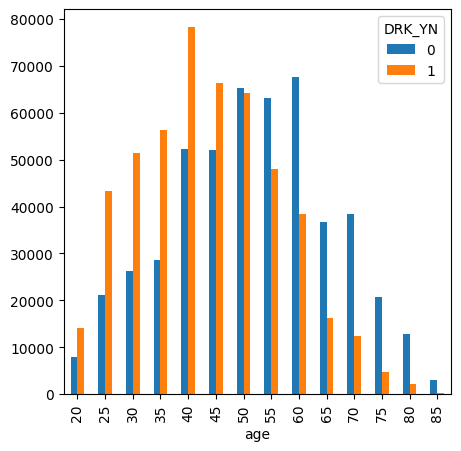

In [48]:
age_drinking_counts = df.groupby(['age', 'DRK_YN']).size().unstack(fill_value=0)
age_drinking_counts.plot(kind='bar', stacked=False, figsize=(5, 5))


The number of drinkers decreases with age from 40 to 85 and increase with age from 20 to 40.
The number of non-drinkers increases with age from 20 to 60 and decreases with age from 60 to 85.
The largest number of drinkers are in the 35-45 age range.
The largest number of non-drinkers are in the 55-65 age range.

In [49]:
age_drinking_counts

DRK_YN,0,1
age,,
20,7936,14035
25,21083,43287
30,26218,51382
35,28506,56220
40,52199,78186
45,52110,66245
50,65322,64112
55,63239,47984
60,67722,38341


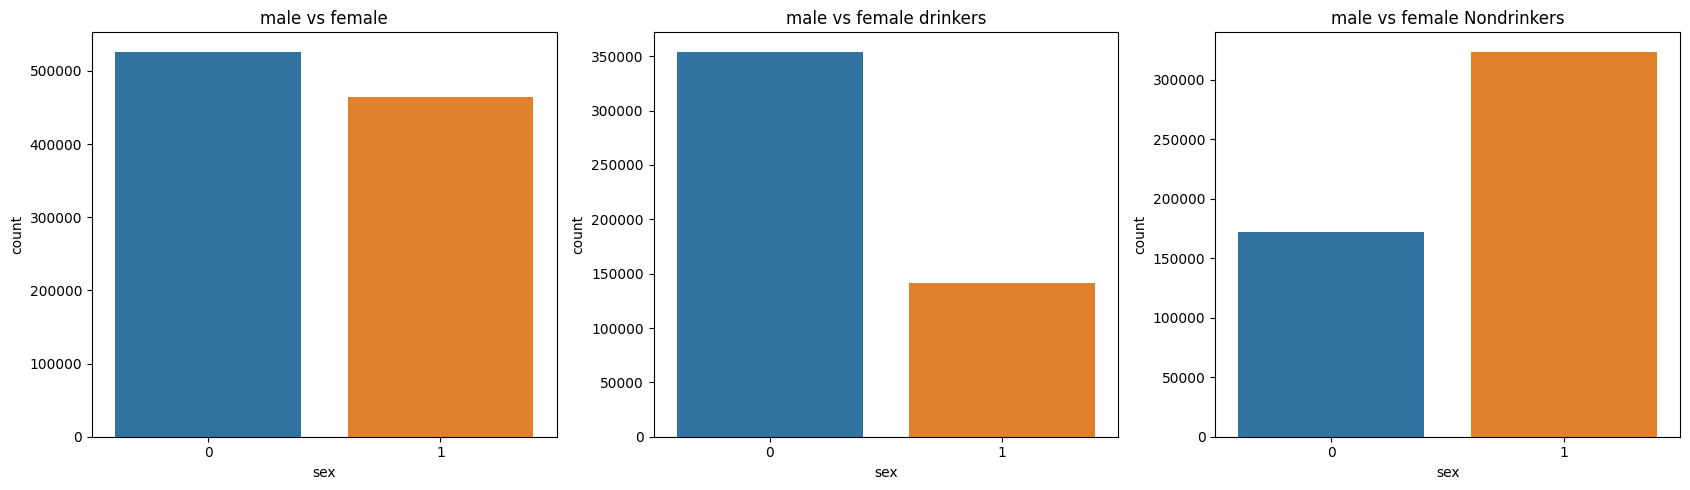

In [50]:
Nondrinkers_df = df[df['DRK_YN'] == 0]
drinkers_df = df[df['DRK_YN'] == 1]
fig=plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.countplot(x="sex" , data =df)
plt.title('male vs female')
plt.subplot(1,3,2)
sns.countplot(x="sex" , data =drinkers_df)
plt.title('male vs female drinkers')
plt.subplot(1,3,3)                                                                                # male vs female
sns.countplot(x="sex" , data =Nondrinkers_df)
plt.title('male vs female Nondrinkers')
plt.tight_layout()

By seeing the above graph we can say that:
    in this data set there 5,00,000 males and 4,50,000 females are there.
    there are more male drinkers than female drinkers.
    there are less male drinkers than female drinkers.   

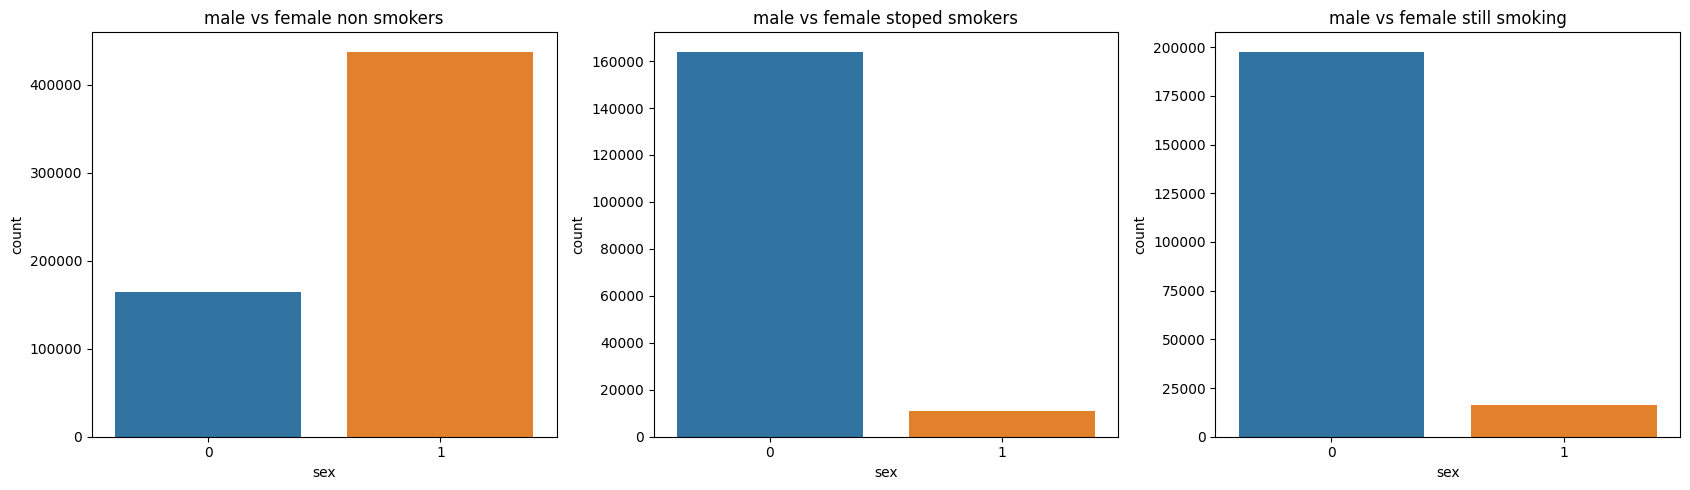

In [51]:
# Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)
nonsmoker_df = df[df['SMK_stat_type_cd'] == 1]
stopedsomker_df = df[df['SMK_stat_type_cd'] == 2]
stillsomker_df = df[df['SMK_stat_type_cd'] == 3]

fig=plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.countplot(x="sex" , data =nonsmoker_df)
plt.title('male vs female non smokers')
plt.subplot(1,3,2)
sns.countplot(x="sex" , data =stopedsomker_df)
plt.title('male vs female stoped smokers')
plt.subplot(1,3,3)                                                                                # male vs female
sns.countplot(x="sex" , data =stillsomker_df)
plt.title('male vs female still smoking')
plt.tight_layout()


By seeing the above graph we can say that:
    there are more females as non smokers as compared to males.
    almost all the females that who have smoking habit the are stopped.
    Males only 80 percent people stoped smoking in middel.
    A small proportion of women are smokers, whereas among men, there is a relatively equal distribution, with most being either current smokers or individuals who have smoked in the past.
    

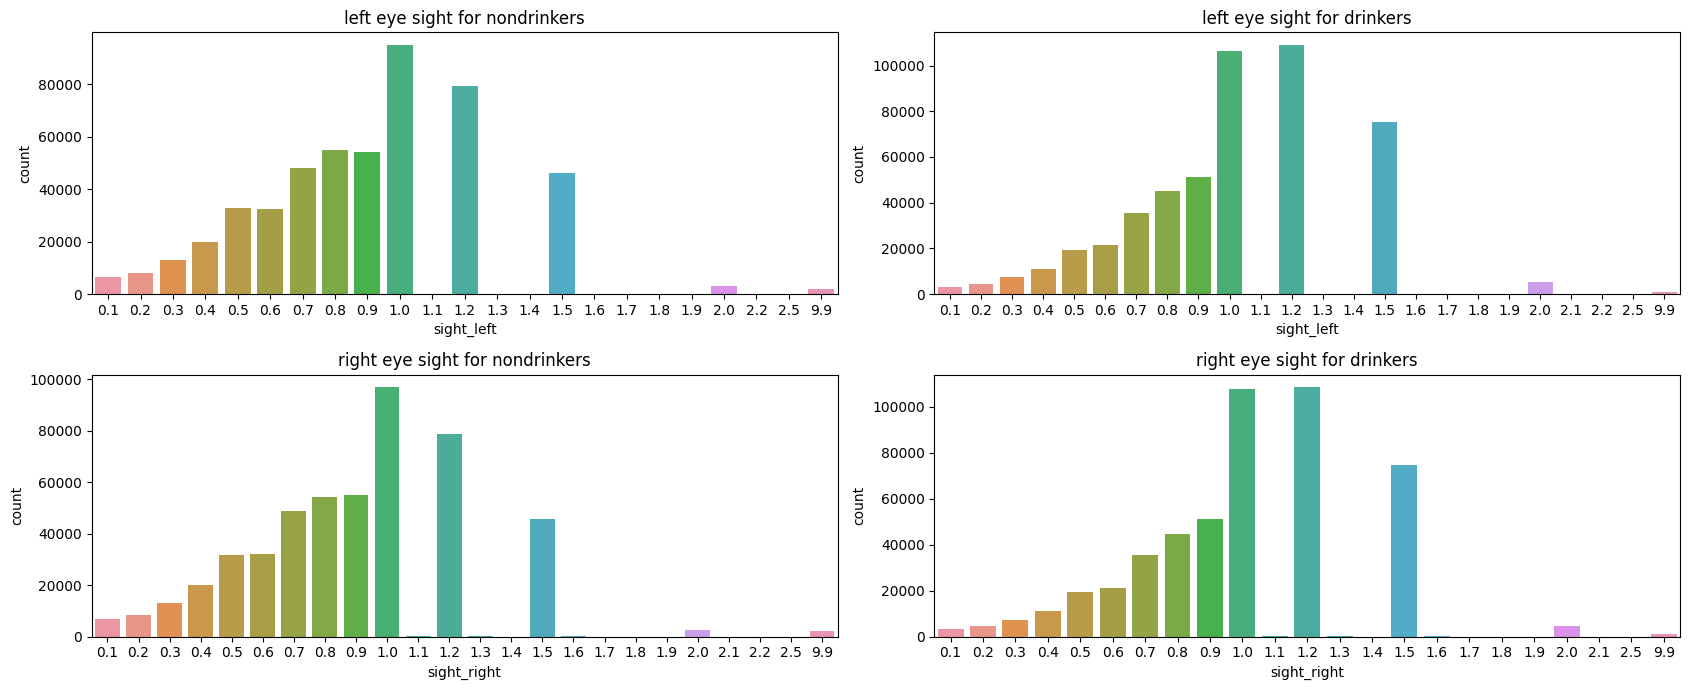

In [52]:
plt.figure(figsize=(17,7))  

plt.subplot(2,2,1)
sns.countplot(x="sight_left" , data =Nondrinkers_df)
plt.title('left eye sight for nondrinkers')
plt.subplot(2,2,2)
sns.countplot(x="sight_left" , data =drinkers_df) 
plt.title('left eye sight for drinkers')
plt.subplot(2,2,3)
sns.countplot(x="sight_right" , data =Nondrinkers_df)
plt.title('right eye sight for nondrinkers')
plt.subplot(2,2,4)
sns.countplot(x="sight_right" , data =drinkers_df) 
plt.title('right eye sight for drinkers')
plt.tight_layout()


from the above plot comparing people who drink and non drinkers there is no big difference so by drinking there is no ptoblem for eye sights for both right and left

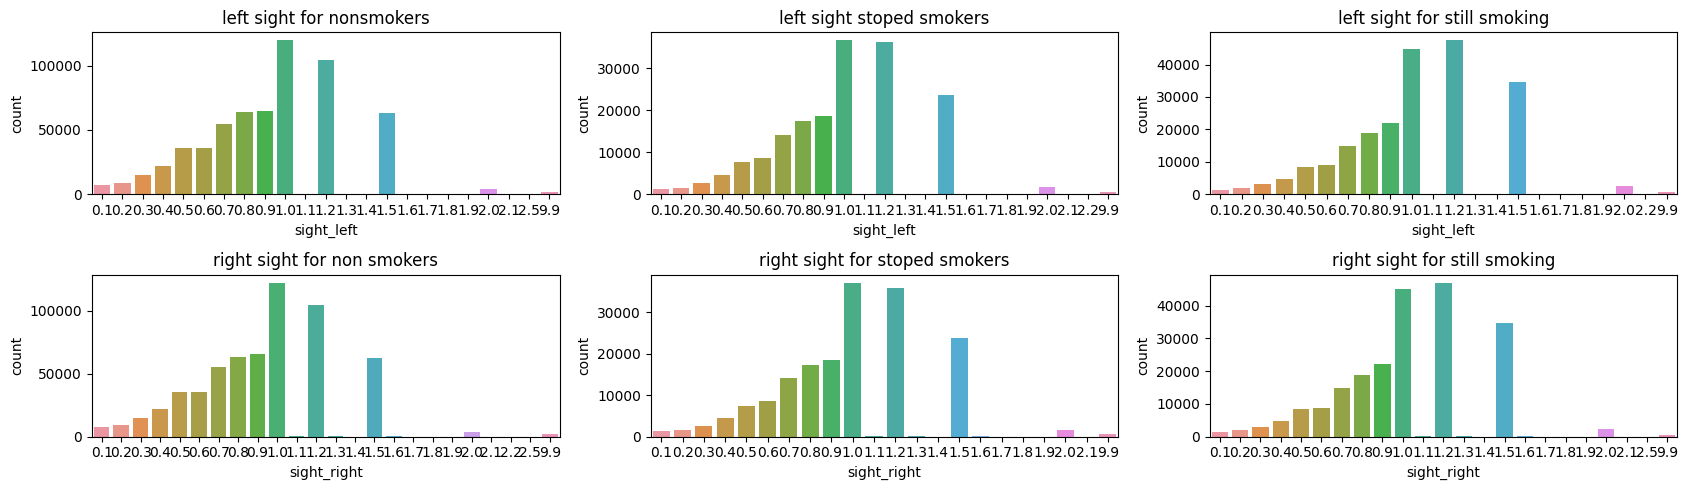

In [53]:
fig=plt.figure(figsize=(17,5))

plt.subplot(2,3,1)
sns.countplot(x="sight_left" , data =nonsmoker_df)
plt.title('left sight for nonsmokers')
plt.subplot(2,3,2)
sns.countplot(x="sight_left" , data =stopedsomker_df)
plt.title('left sight stoped smokers')
plt.subplot(2,3,3)                                                                                
sns.countplot(x="sight_left" , data =stillsomker_df)
plt.title('left sight for still smoking')

plt.subplot(2,3,4)
sns.countplot(x="sight_right" , data =nonsmoker_df)
plt.title('right sight for non smokers')
plt.subplot(2,3,5)
sns.countplot(x="sight_right" , data =stopedsomker_df)
plt.title('right sight for stoped smokers')
plt.subplot(2,3,6)                                                                               
sns.countplot(x="sight_right" , data =stillsomker_df)
plt.title('right sight for still smoking')
plt.tight_layout()


there is no much relationship for smoking and sight

Text(0.5, 1.0, 'Smokers')

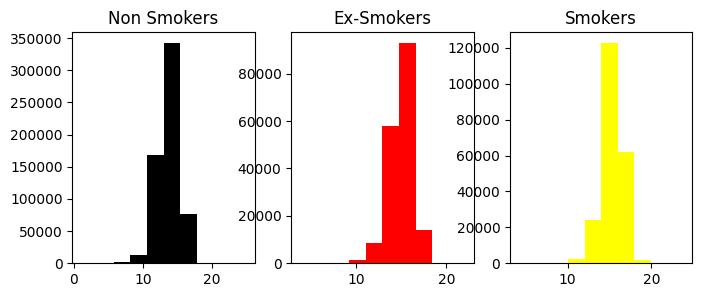

In [54]:
fig,axes = plt.subplots (nrows=1,ncols=3,figsize =(8,3))


axes[0].hist(nonsmoker_df['hemoglobin'],color = 'black')
axes[0].set_title('Non Smokers')
axes[1].hist(stopedsomker_df['hemoglobin'],color = 'red')
axes[1].set_title('Ex-Smokers')
axes[2].hist(stillsomker_df['hemoglobin'],color = 'yellow')
axes[2].set_title('Smokers')

Text(0.5, 1.0, 'Hemoglobin level - Smokers vs Non - Smokers')

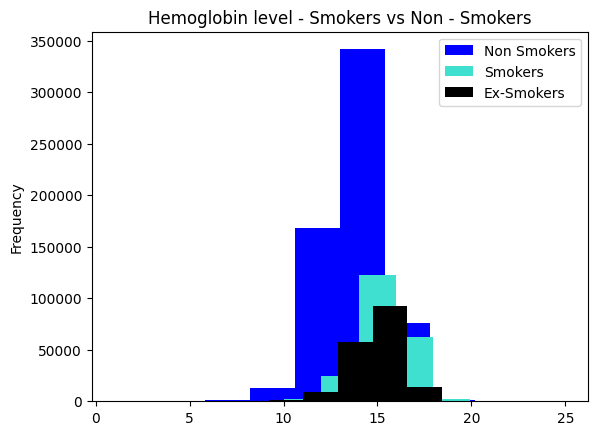

In [117]:
nonsmoker_df['hemoglobin'].plot.hist(label='Non Smokers',legend=True,color='blue')
##non_smokers['hemoglobin'].plot.kde()
##ex_smokers['hemoglobin'].plot.hist(label = 'ex',legend=True)
stillsomker_df['hemoglobin'].plot.hist(label ='Smokers',legend=True,color='turquoise')
#smokers['hemoglobin'].plot.kde()
stopedsomker_df['hemoglobin'].plot.hist(label ='Ex-Smokers',legend=True,color='black')
plt.title('Hemoglobin level - Smokers vs Non - Smokers')

In [57]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,0,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,0,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,0,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,0,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,0,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0
991342,0,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0
991343,1,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1
991344,0,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0


# Now let us check the normality in the dataset using the boxplots.

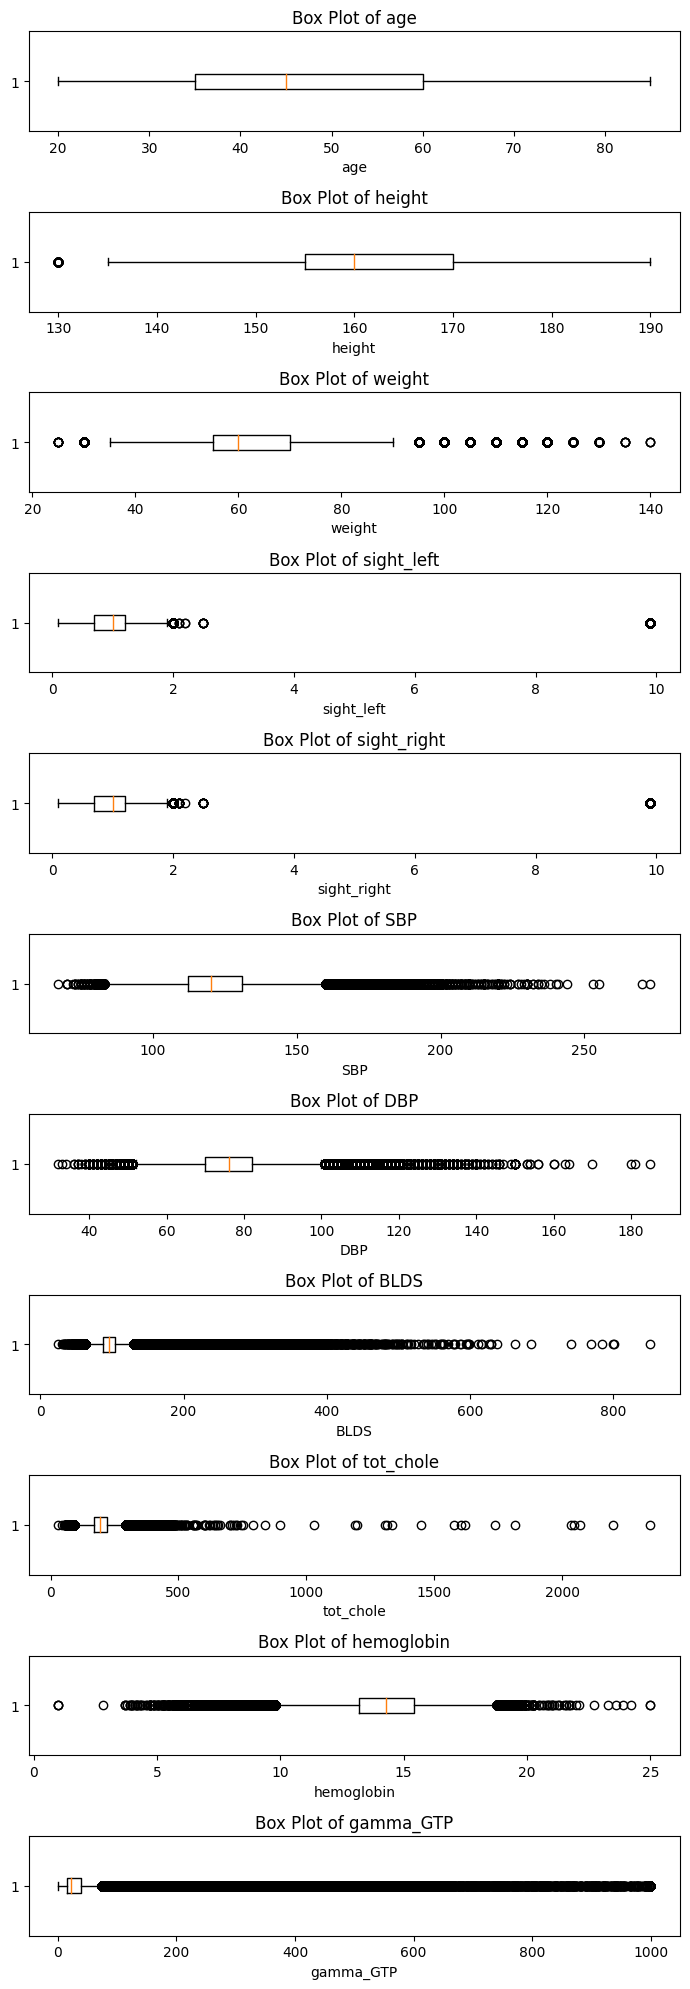

In [58]:
def plot_boxplots(df):
    exclude_cols = ['waistline', 'hear_left', 'hear_right', 'triglyceride', 'serum_creatinine','sex','DRK_YN','SMK_stat_type_cd','urine_protein','SGOT_AST','SGOT_ALT','HDL_chole','LDL_chole']
    numerical_cols = df.select_dtypes(include=['number']).drop(exclude_cols, axis=1, errors='ignore')
    num_rows, num_cols = 11,1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(7, 20))
    axes = axes.flatten()
    for i, col in enumerate(numerical_cols.columns):
        ax = axes[i]
        ax.boxplot(df[col], vert=False)
        ax.set_title(f'Box Plot of {col}')
        ax.set_xlabel(col)
    for i in range(len(numerical_cols.columns), num_rows * num_cols):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()
plot_boxplots(df)

Age: 
The box plot is skewed to the right, with a few outliers on the right side. The median is around 40 years old. This suggests that the data is not normally distributed.
Height: 
Box plot skewed right, with outliers. Median height is around 170 cm. Not normally distributed.
Weight:
Box plot skewed right, with outliers. Median weight is around 70 kg. Not normally distributed.
Sight left:
Box plot skewed right, with outliers. Median sight left is around 1.00. Not normally distributed.
Sight right:
Box plot skewed right, with outliers. Median sight right is around 1.00. Not normally distributed.
SBP:
Box plot skewed right, with outliers. Median SBP is around 150 mmHg. Not normally distributed.
DBP:
Box plot skewed right, with outliers. Median DBP is around 80 mmHg. Not normally distributed.
BLDS:
Box plot skewed right, with outliers. Median BLDS is around 300 mg/dL. Not normally distributed.
Total cholesterol:
Box plot is skewed right, with outliers. Median total cholesterol is around 500 mg/dL. Not normally distributed.
Hemoglobin:
Box plot is skewed right, with outliers. Median hemoglobin is around 15 g/dL. Not normally distributed.
Gamma GTP:
Box plot is skewed right, with outliers. Median gamma-glutamyl transferase (GGT) is around 200 U/L. Not normally distributed.

In [59]:
df.skew(axis=0)

sex                   0.124281
age                   0.153653
height               -0.022737
weight                0.576557
waistline            26.788440
sight_left            9.994626
sight_right          10.033647
hear_left             5.365084
hear_right            5.463013
SBP                   0.482060
DBP                   0.400034
BLDS                  4.617377
tot_chole             1.556882
HDL_chole           104.577635
LDL_chole             5.251739
triglyceride          6.529373
hemoglobin           -0.383988
urine_protein         5.672491
serum_creatinine    111.022058
SGOT_AST            150.491690
SGOT_ALT             50.038872
gamma_GTP             7.718509
SMK_stat_type_cd      0.831428
DRK_YN                0.000746
dtype: float64

In [60]:
df = df.drop(['waistline', 'hear_left', 'hear_right', 'triglyceride', 'serum_creatinine','sex','DRK_YN','SMK_stat_type_cd','urine_protein','SGOT_AST','SGOT_ALT','HDL_chole','LDL_chole'],axis=1)

In [61]:
df

,age,height,weight,sight_left,sight_right,SBP,DBP,BLDS,tot_chole,hemoglobin,gamma_GTP
0,35,170,75,1.0,1.0,120.0,80.0,99.0,193.0,17.1,40.0
1,30,180,80,0.9,1.2,130.0,82.0,106.0,228.0,15.8,27.0
2,40,165,75,1.2,1.5,120.0,70.0,98.0,136.0,15.8,68.0
3,50,175,80,1.5,1.2,145.0,87.0,95.0,201.0,17.6,18.0
4,50,165,60,1.0,1.2,138.0,82.0,101.0,199.0,13.8,25.0
...,...,...,...,...,...,...,...,...,...,...,...
991341,45,175,80,1.5,1.5,114.0,80.0,88.0,198.0,15.0,27.0
991342,35,170,75,1.0,1.5,119.0,83.0,83.0,133.0,15.8,15.0
991343,40,155,50,1.0,0.7,110.0,70.0,90.0,205.0,14.3,17.0
991344,25,175,60,1.5,1.0,119.0,74.0,69.0,122.0,14.5,17.0


In [62]:
def skew(df,feature):
    fig,axes = plt.subplots(1,3,figsize=(15,4))
    sns.boxplot(ax=axes[0],data=df,y=feature)
    axes[0].set_title(f"{feature} BoxPlot")
    sns.histplot(ax=axes[1],data=df,x=feature,kde=True,color='red',label=round(df[feature].skew(),3))
    axes[1].set_title(f"{feature} HistPlot")
    scipy.stats.probplot(df[feature], sparams=(), dist='norm', fit=True, plot=axes[2], rvalue=False)
    axes[2].set_title(f"{feature} Probabiltity Plot")
    axes[1].legend()
    plt.show()

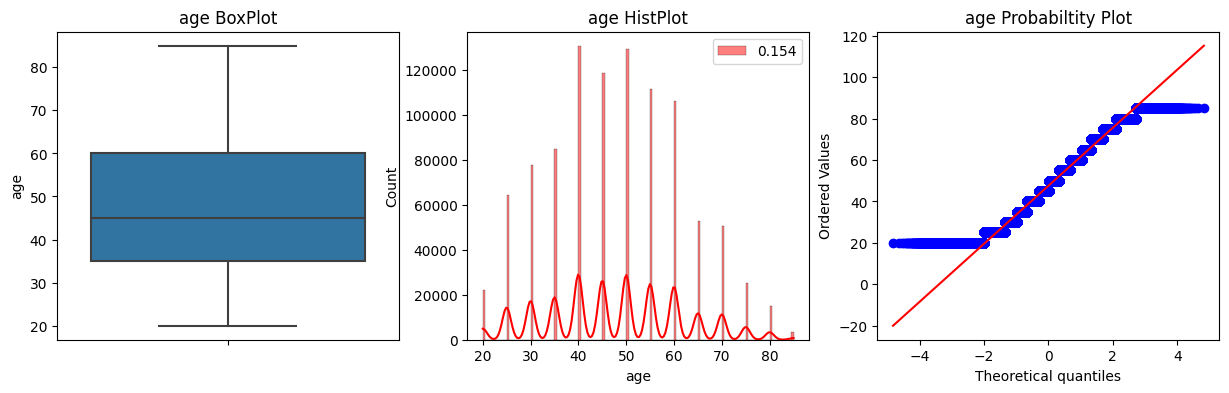

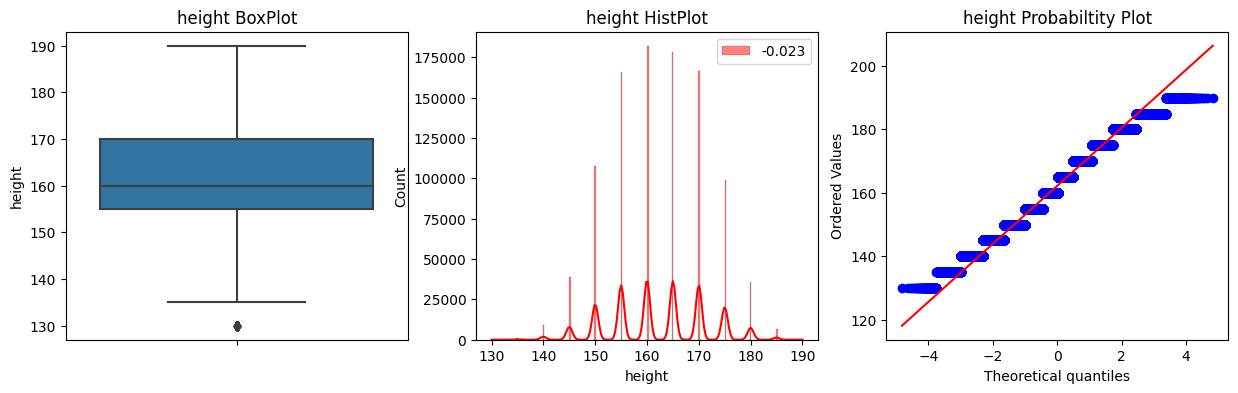

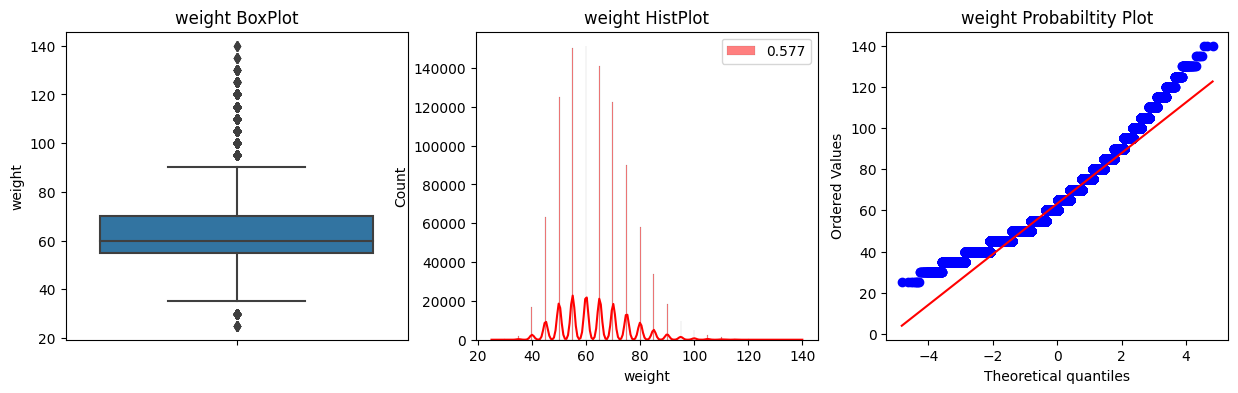

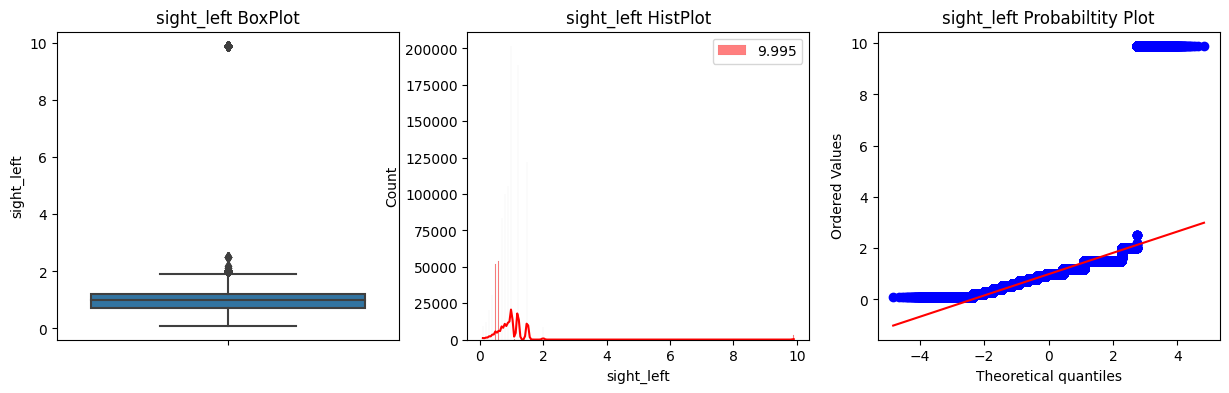

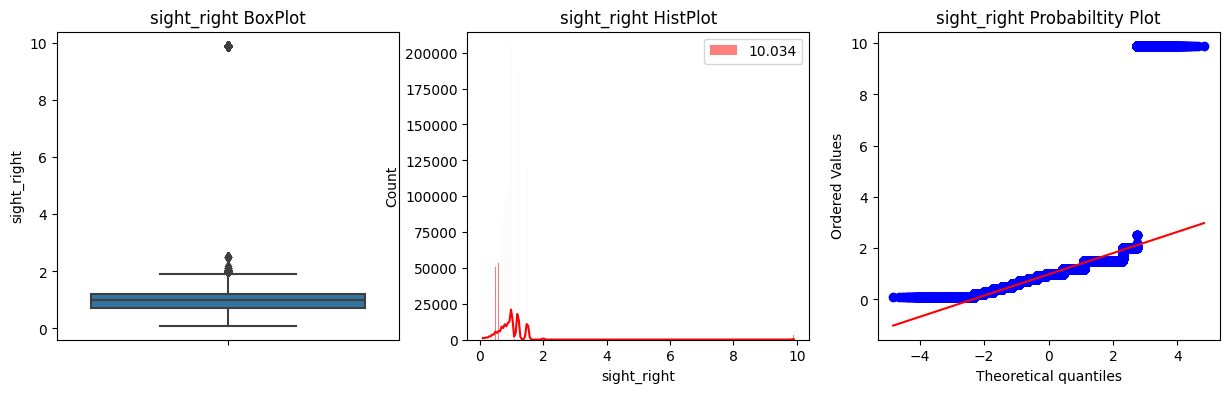

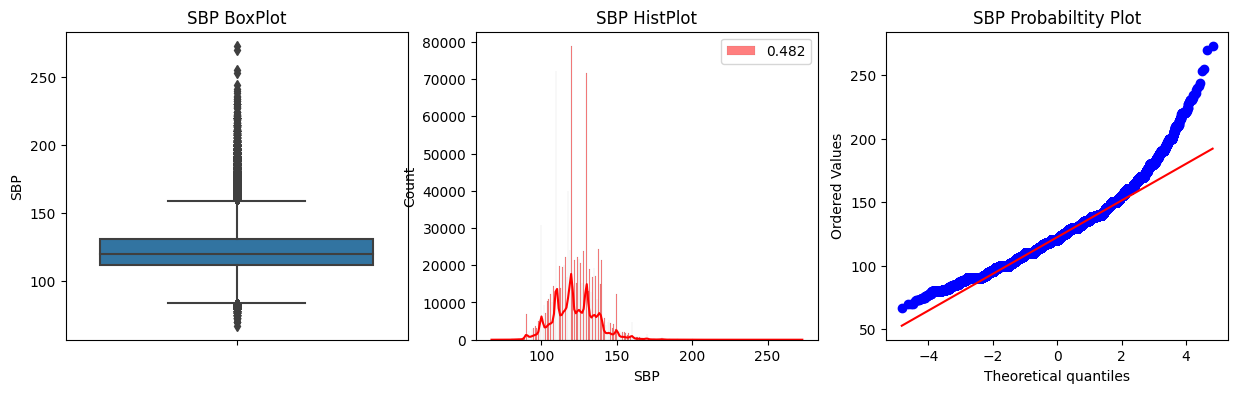

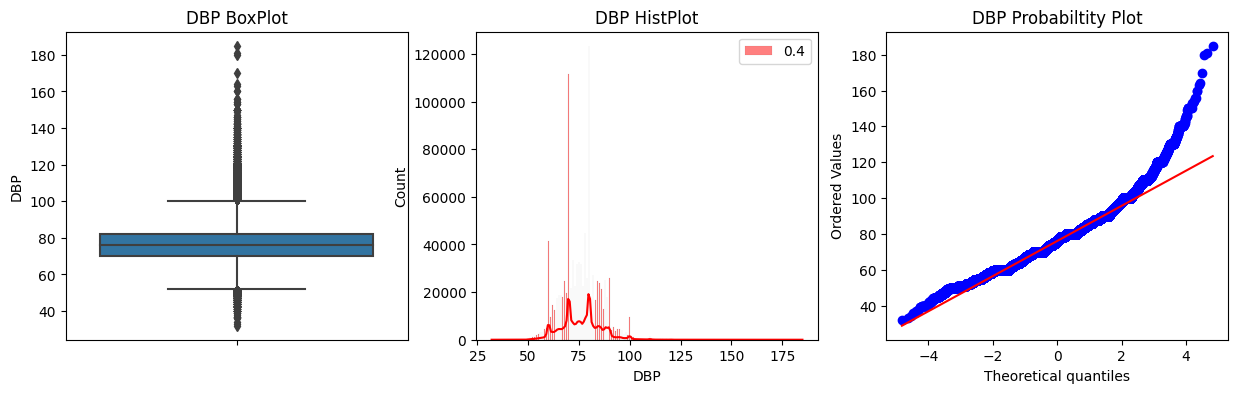

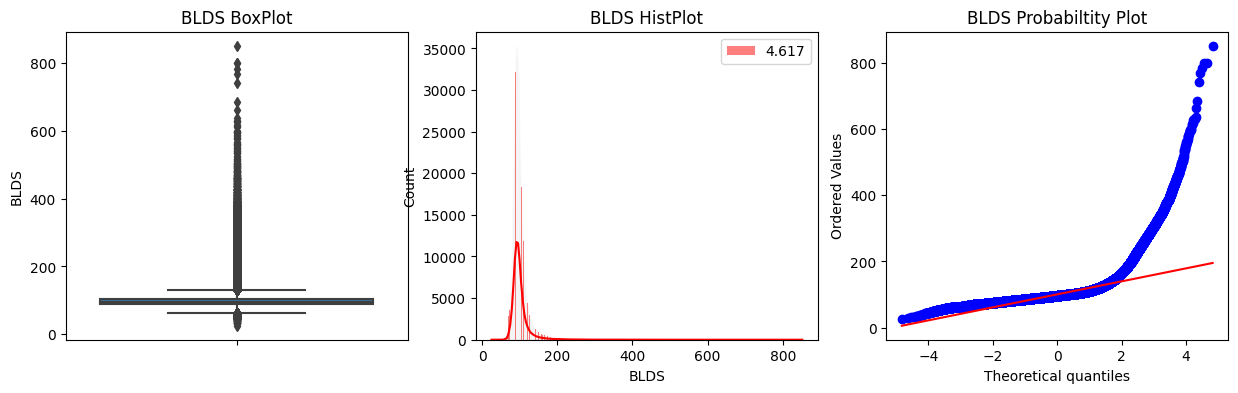

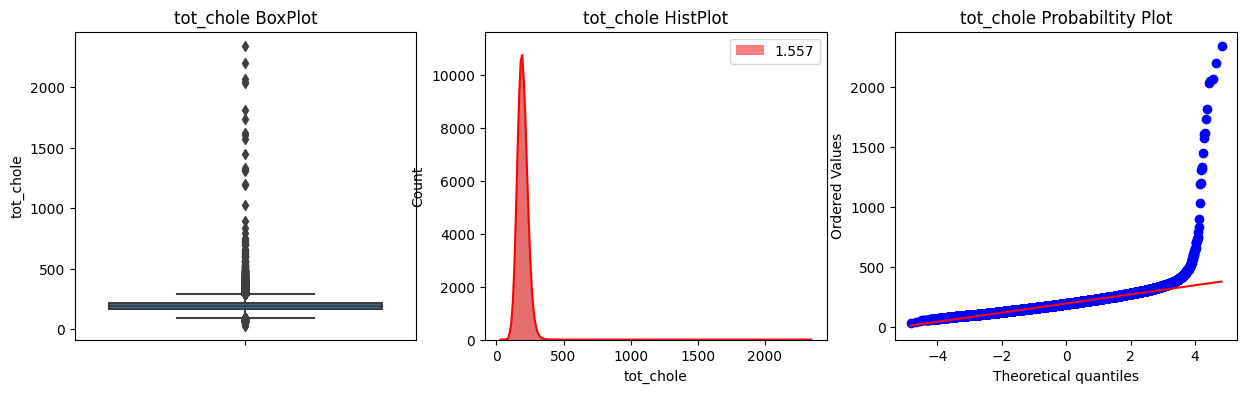

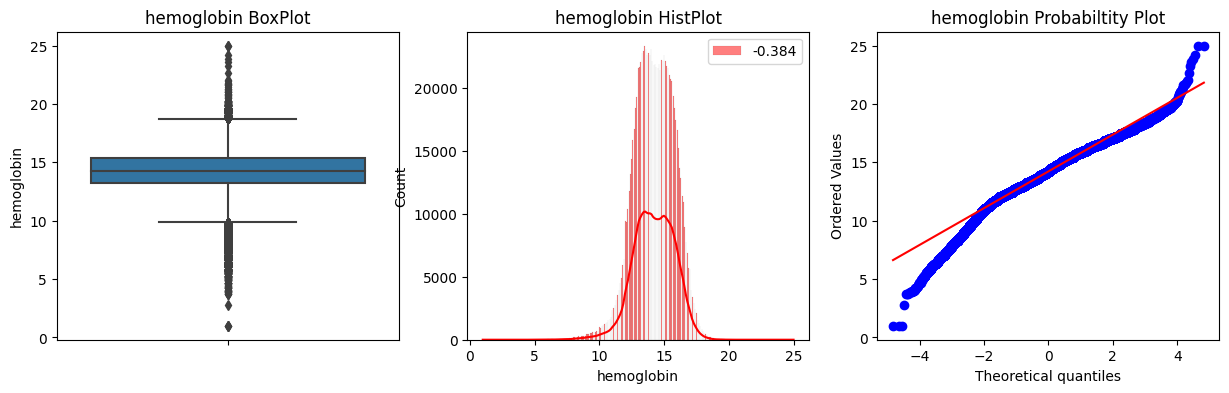

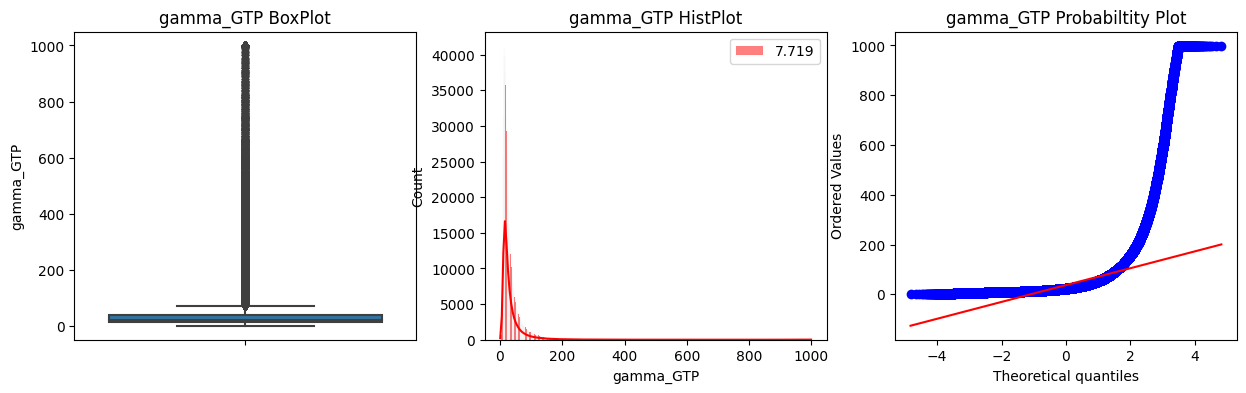

In [63]:
for cols in df:
    skew(df,cols)

# Now by using Boxcox we transform the data to normal.

In [64]:
for col in df.columns:
        # Add a small constant to handle non-positive values
        df[col] = df[col] + 1e-5  # You can adjust the constant as needed
        df[col], lam = stats.boxcox(df[col])

In [65]:
df.skew(axis=0)

age           -0.047482
height        -0.011202
weight         0.001635
sight_left     0.286771
sight_right    0.300852
SBP           -0.001404
DBP            0.001627
BLDS          -0.244815
tot_chole      0.017867
hemoglobin     0.010067
gamma_GTP      0.022813
dtype: float64

We can observe that there is a change in the skewness of the datapoints after transformation.

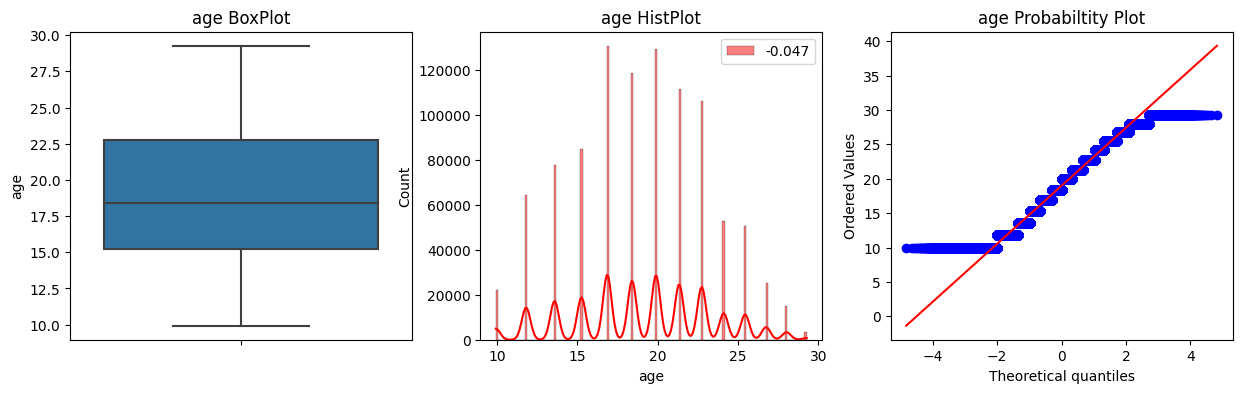

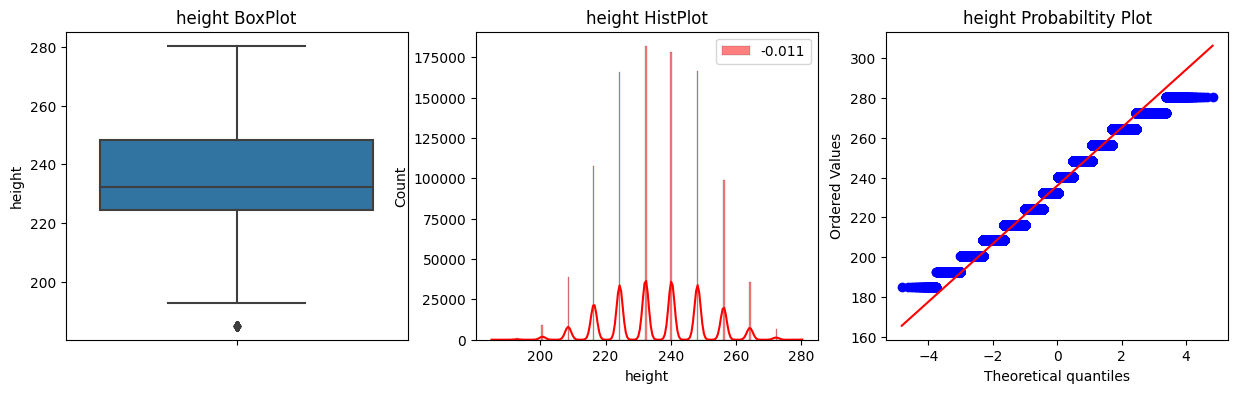

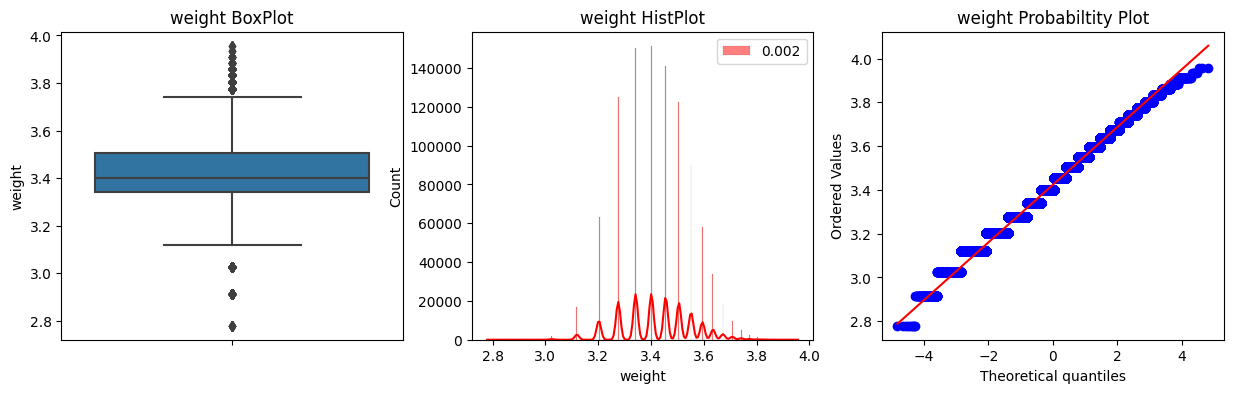

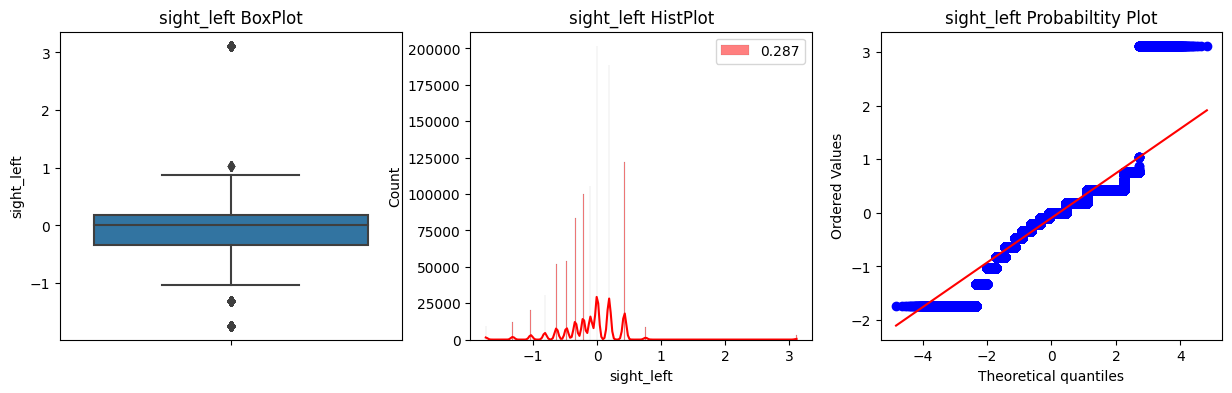

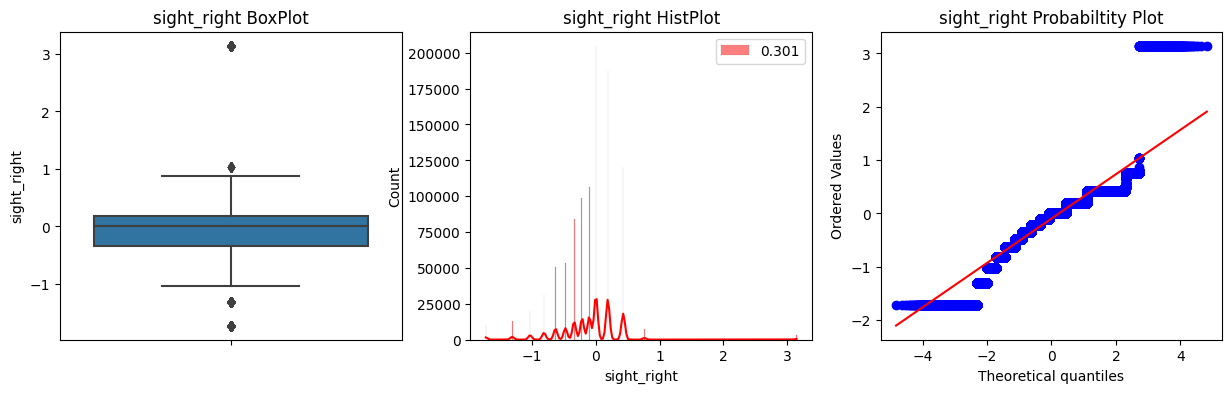

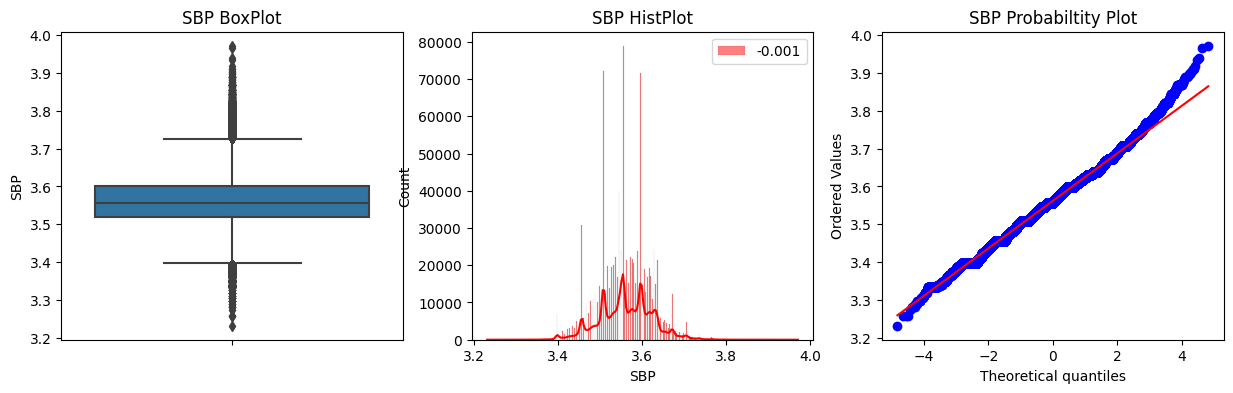

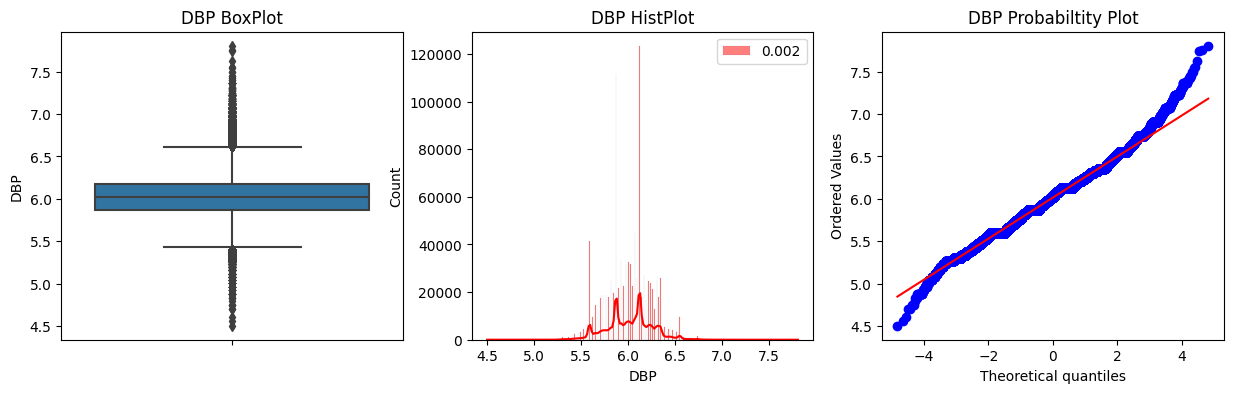

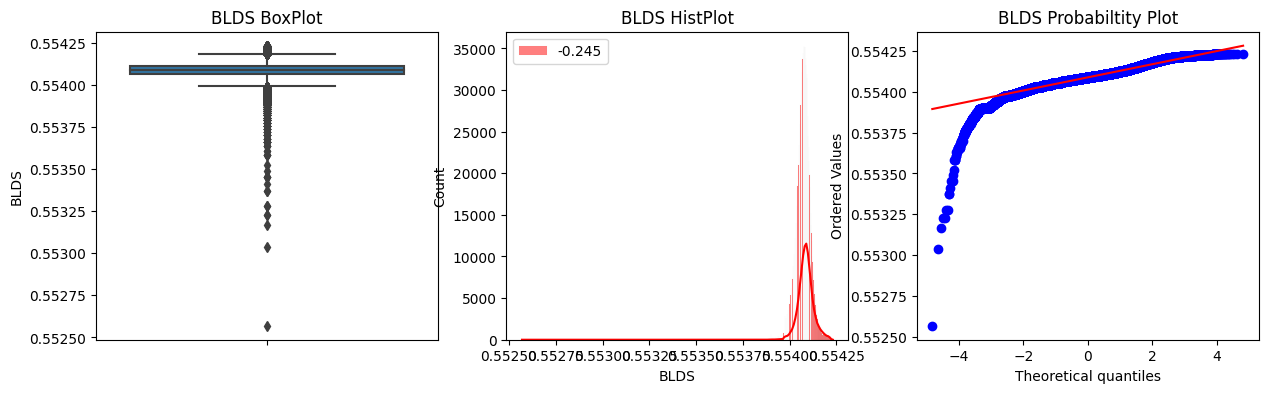

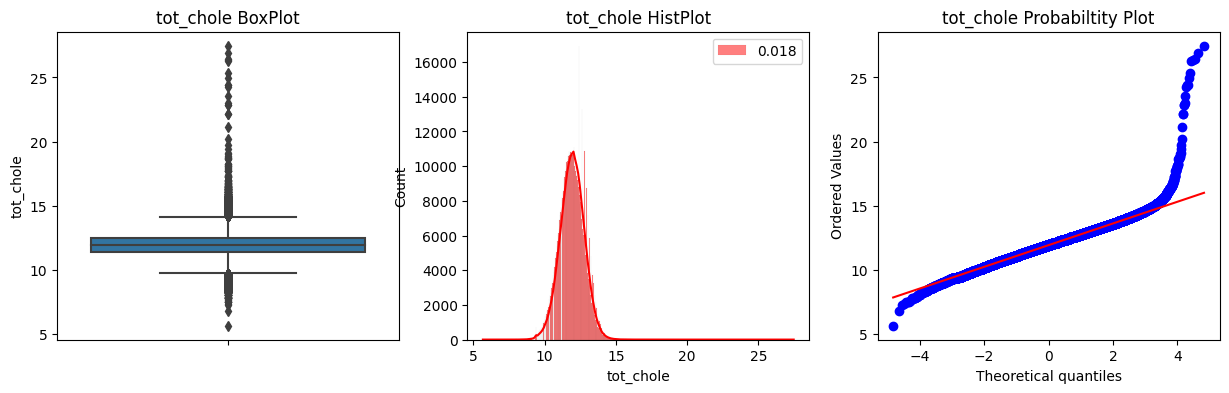

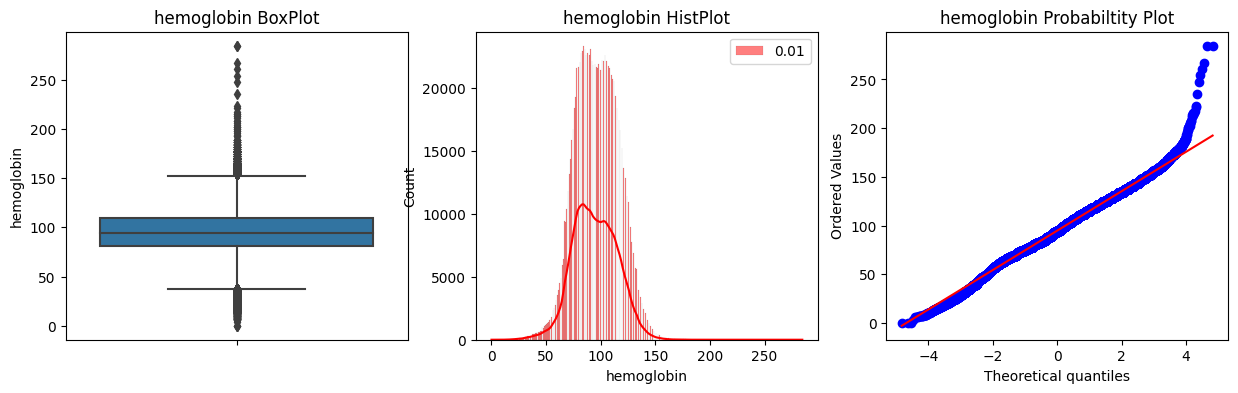

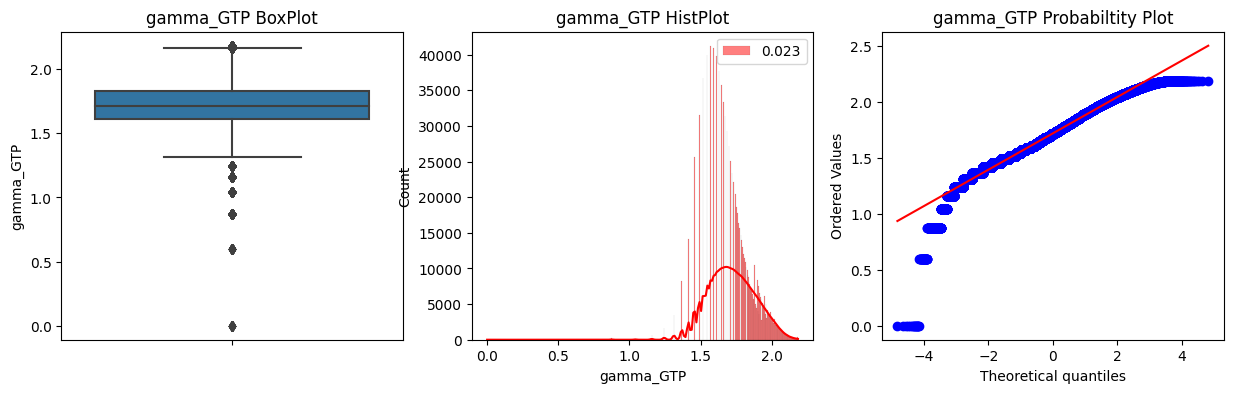

In [66]:
for cols in df:
    skew(df,cols)

# Testing Hypothesis

In [68]:
Test_df = pd.read_csv("smoking_driking.csv")

In [69]:
Test_df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [71]:
Age_mean=Test_df['age'].mean()
Age_mean

47.614490803412735

# Z-test

### hypothesis H0:μ=45 , H1:μ != 45 , alpha=5%

1) $ H0 = 45 $
2) $ alpha = 0.05 $
4) $ n = 991346 $

In [96]:
H0 = 45
sigma = df['age'].std()
n = 991346
alpha = 0.05

In [97]:
Zcal = (Age_mean - H0)/(sigma/sqrt(n))     # testing using Z-Test.

In [98]:
Zcal

611.0739260148366

In [99]:
p =2*(1- stats.norm.cdf(np.abs(Zcal)))
if p < alpha:
    print('Reject H0')
else:
    print('Do not Reject H0')

Reject H0


it is rejected since the mean of age is 47.614490803412735

# t-test

### hypothesis   H0:μ=160 , H1:μ != 160 , alpha=1%

1) $ H0 = 160 $
2) $ alpha = 0.01 $
4) $ n = 991346 $

In [106]:
Height_mean=Test_df['height'].mean()
Height_mean

162.24062537196903

In [107]:
std = Test_df['height'].std()
std

9.28295747099344

In [108]:
H0 = 160
alpha=0.01
n =991346

In [109]:
tcal = (Height_mean-H0)/(std)/(sqrt(n))
tcal

0.0002424210117151758

In [112]:
p =2*(1- stats.t.cdf(np.abs(tcal),df=n-1))
if p < tcal:
    print("Reject H0")
else:
    print("Do not Reject H0")

Do not Reject H0
